In [48]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn import metrics

In [50]:
start = '2017-01-01'
end = '2021-10-01'

In [51]:
data = yf.download('CL=F PTTEP.BK GPSC.BK PTTGC.BK PTT.BK', start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [52]:
df = data['Adj Close']

In [53]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-03,52.330002,NaN,NaN,NaN,NaN
2017-01-04,53.259998,29.233921,30.196190,74.474815,49.715393
2017-01-05,53.759998,28.641338,30.752438,74.096779,49.909592
2017-01-06,53.990002,28.641338,30.911364,74.474815,49.715393
2017-01-09,51.959999,28.641338,30.434578,73.907745,49.132797
...,...,...,...,...,...
2021-09-24,73.980003,NaN,NaN,NaN,NaN
2021-09-27,75.449997,75.980133,38.509056,111.294357,59.785229
2021-09-28,75.290001,75.240067,38.509056,113.196823,61.721592


In [54]:
df = df.pct_change()

In [55]:
df = df.dropna()

In [56]:
df

,CL=F,GPSC.BK,PTT.BK,PTTEP.BK,PTTGC.BK
Date,,,,,
2017-01-05,0.009388,-0.020270,0.018421,-0.005076,0.003906
2017-01-06,0.004278,0.000000,0.005168,0.005102,-0.003891
2017-01-09,-0.037600,0.000000,-0.015424,-0.007614,-0.011719
2017-01-10,-0.021940,0.006897,0.013055,-0.017903,0.003952
2017-01-11,0.028139,0.006849,-0.007732,0.005208,-0.003937
...,...,...,...,...,...
2021-09-24,0.009277,0.000000,0.000000,0.000000,0.000000
2021-09-27,0.019870,-0.012821,0.012500,0.035398,0.020661
2021-09-28,-0.002121,-0.009740,0.000000,0.017094,0.032389


In [57]:
df = df[['CL=F', 'GPSC.BK','PTTEP.BK', 'PTTGC.BK', 'PTT.BK']]

In [58]:
df.head(1)

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK,PTT.BK
Date,,,,,
2017-01-05,0.009388,-0.02027,-0.005076,0.003906,0.018421


In [59]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [61]:
X_train

,CL=F,GPSC.BK,PTTEP.BK,PTTGC.BK
Date,,,,
2017-05-22,0.007948,0.007353,0.005319,0.000000
2017-11-22,0.020940,0.008621,0.005391,0.003185
2021-08-12,-0.002311,0.000000,0.000000,0.000000
2017-01-18,-0.026677,-0.006897,-0.015625,0.019531
2019-07-15,-0.010463,-0.006993,0.000000,0.003984
...,...,...,...,...
2018-08-16,0.006922,0.025180,-0.010989,-0.009202
2018-11-01,-0.024805,-0.012987,-0.010753,-0.006472
2017-03-15,0.023889,0.040000,-0.008380,-0.013514


In [62]:
model = LinearRegression()
reg = model.fit(X_train, y_train)

In [63]:
reg.score(X_test, y_test)

0.6235514031859479

In [64]:
y_pred = model.predict(X_test)

In [65]:
y_pred

array([-2.87205330e-03,  5.21676897e-03, -1.74017172e-03, -8.35842737e-03,
        1.77056515e-02,  1.19958651e-02,  1.12298584e-02,  5.92860983e-03,
        9.48352870e-03,  3.45002896e-03,  2.55401446e-04,  2.50900950e-03,
       -1.69553576e-04, -1.84201754e-04,  7.08004912e-03,  5.81711121e-03,
        1.79974439e-02, -7.02017114e-03,  1.20956030e-02, -8.79043921e-03,
        1.40947659e-02, -5.24994502e-03,  5.12177909e-03, -5.31820894e-03,
       -5.32191501e-03,  8.10722990e-03,  4.51478913e-04, -2.04278302e-03,
        5.65096073e-03,  2.11686410e-03, -4.12766118e-02, -7.68324498e-03,
       -1.18937750e-02, -1.13992127e-02,  3.50338713e-03, -1.28651256e-02,
       -7.08058500e-03, -3.50347186e-03,  2.57029676e-03, -3.65371053e-03,
        1.58108585e-02,  2.31624603e-03, -9.94886299e-03, -1.51274908e-04,
        1.25883904e-02,  1.98615764e-03, -1.01127521e-02, -8.40726866e-03,
        1.60832195e-02, -2.11560958e-02, -1.53689597e-04,  5.63168488e-03,
        2.32786967e-04, -

In [66]:
print("Score = ", metrics.r2_score(y_test, y_pred))

Score =  0.6235514031859479


In [67]:
reg.coef_

array([-0.00079811,  0.06184102,  0.47774415,  0.25535312])

In [68]:
m = model.coef_
b = model.intercept_

In [69]:
m

array([-0.00079811,  0.06184102,  0.47774415,  0.25535312])

In [70]:
b

-0.00016747050286924437

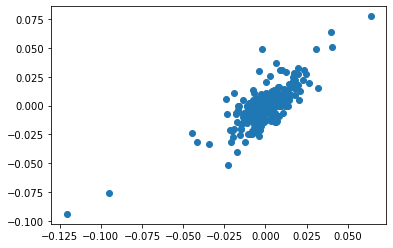

In [71]:
plt.scatter(y_pred, y_test)

In [72]:
print("MAE = ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE = ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE =  0.007849103325943891
MSE =  0.00011615140940896554
RMSE =  0.01077735632745645


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
model = LinearRegression()
reg = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE = ", metrics.mean_squared_error(y_test, y_pred))

MSE =  0.00010339880972787798


In [74]:
score = []

for i in range(0,5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LinearRegression()
    reg = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score.append(metrics.mean_squared_error(y_test, y_pred))
    print("MSE = ", metrics.mean_squared_error(y_test, y_pred))

MSE =  0.00010667261419913869
MSE =  8.739830730684709e-05
MSE =  0.00010968007060649692
MSE =  9.495565402083982e-05
MSE =  0.00010259023579312972


In [75]:
score

[0.00010667261419913869,
 8.739830730684709e-05,
 0.00010968007060649692,
 9.495565402083982e-05,
 0.00010259023579312972]

In [76]:
np.mean(score)

0.00010025937638529045

In [77]:
len(X.index)

1229

### Scikit Learn - Cross Validation

In [78]:
from sklearn.model_selection import KFold

In [79]:
kfold = KFold(10, shuffle=True, random_state=42)

In [80]:
kfold

KFold(n_splits=10, random_state=42, shuffle=True)

In [81]:
kfold = KFold(5, shuffle=False, random_state=None)

In [82]:
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [83]:
for train, test in kfold.split(y):
    print('train: %s, test: %s' % (y[train], y[test]))

train: Date
2017-12-18    0.009259
2017-12-19    0.004587
2017-12-20    0.004566
2017-12-21   -0.004545
2017-12-22    0.018265
                ...   
2021-09-24    0.000000
2021-09-27    0.012500
2021-09-28    0.000000
2021-09-29   -0.001272
2021-09-30   -0.006370
Name: PTT.BK, Length: 983, dtype: float64, test: Date
2017-01-05    0.018421
2017-01-06    0.005168
2017-01-09   -0.015424
2017-01-10    0.013055
2017-01-11   -0.007732
                ...   
2017-12-11    0.000000
2017-12-12    0.014218
2017-12-13   -0.004673
2017-12-14    0.009390
2017-12-15    0.004651
Name: PTT.BK, Length: 246, dtype: float64
train: Date
2017-01-05    0.018421
2017-01-06    0.005168
2017-01-09   -0.015424
2017-01-10    0.013055
2017-01-11   -0.007732
                ...   
2021-09-24    0.000000
2021-09-27    0.012500
2021-09-28    0.000000
2021-09-29   -0.001272
2021-09-30   -0.006370
Name: PTT.BK, Length: 983, dtype: float64, test: Date
2017-12-18    0.009259
2017-12-19    0.004587
2017-12-20    0.00456

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.80374958, 0.58454901, 0.56168417, 0.56713709, 0.51992505])

In [86]:
from numpy import mean
from numpy import std

In [87]:
print('Accuracy: %.2f (%.2f)' % (mean(scores), std(scores)))

Accuracy: 0.61 (0.10)


In [88]:
kfold = KFold(3, shuffle=False, random_state=None)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=kfold)
scores

array([0.77233954, 0.57118652, 0.5422285 ])

#### Vary number of foldes to find out variations result for each fold

In [89]:
kfold = KFold(5, shuffle=False, random_state=None)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=kfold)
scores

array([0.80374958, 0.58454901, 0.56168417, 0.56713709, 0.51992505])

In [90]:
kfold = KFold(10, shuffle=False, random_state=None)
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=kfold)
scores

array([0.52395252, 0.84471523, 0.41427141, 0.66561153, 0.58882279,
       0.53340655, 0.51055517, 0.63667925, 0.5869287 , 0.35879978])

In [91]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
scores

array([0.52395252, 0.84471523, 0.41427141, 0.66561153, 0.58882279,
       0.53340655, 0.51055517, 0.63667925, 0.5869287 , 0.35879978])

In [92]:
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores

array([-1.23000045e-04, -1.78971413e-04, -8.18210216e-05, -8.95380023e-05,
       -9.68332638e-05, -9.59733242e-05, -1.31720373e-04, -7.70226864e-05,
       -1.21751568e-04, -1.06263629e-04])

In [93]:
%%timeit
scores3 = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=1)

24.1 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [94]:
# %%timeit
# scores4 = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)